<h1>Содержание<span class="tocSkip"></span></h1>
</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Предоработка-текста" data-toc-modified-id="Предоработка-текста-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предоработка текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Разбиение-на--варианты-признаков-датасетов" data-toc-modified-id="Разбиение-на--варианты-признаков-датасетов-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Разбиение на  варианты признаков датасетов</a></span></li><li><span><a href="#TF-IDF-для-корпуса-текстов" data-toc-modified-id="TF-IDF-для-корпуса-текстов-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>TF-IDF для корпуса текстов</a></span></li><li><span><a href="#CountVectorizer-для-корпуса-текстов" data-toc-modified-id="CountVectorizer-для-корпуса-текстов-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>CountVectorizer для корпуса текстов</a></span></li></ul></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression---TF-IDF" data-toc-modified-id="LogisticRegression---TF-IDF-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>LogisticRegression - TF-IDF</a></span></li><li><span><a href="#LogisticRegression---CountVectorizer" data-toc-modified-id="LogisticRegression---CountVectorizer-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>LogisticRegression - CountVectorizer</a></span></li></ul></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier--TF-IDF-без-лемматизации-текста" data-toc-modified-id="DecisionTreeClassifier--TF-IDF-без-лемматизации-текста-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier- TF-IDF без лемматизации текста</a></span></li></ul></li><li><span><a href="#LogisticRegression-на-тестовой-выборке" data-toc-modified-id="LogisticRegression-на-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import notebook


import re

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier



In [2]:
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

Defaulting to user installation because normal site-packages is not writeable


In [3]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None


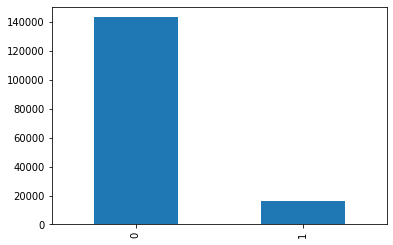

In [6]:
data['toxic'].value_counts().plot(kind='bar')

**Вывод**
Видим, что почти 90% комментариев имеет нейтральную или позитивную тональность, а 10 - негативную. Т.е., каждый 10-й комментарий можно трактовать как токсичный.

Перед тем, как перейти к обучению моделей, сделаем предобработку текста:

- очистим комментарии от лишних символов (скобки, кавычки, пробелы и т.д.)
- удалим стоп-слова
- сделаем лемматизацию слов и посмотрим, какие слова чаще всего используется в комментариях разной тональности.

In [7]:
df_toxic = data[data['toxic']==1]
df_nottoxic = data[data['toxic']==0]

All = " ".join(review for review in data.text)
toxic = " ".join(review for review in df_toxic.text)
nottoxic = " ".join(review for review in df_nottoxic.text)

In [8]:
lists_of_comments_by_type = {'Все комментарии' : All, 
                             'Токсичные комментарии': toxic, 
                             'Нейтральные комментарии': nottoxic}

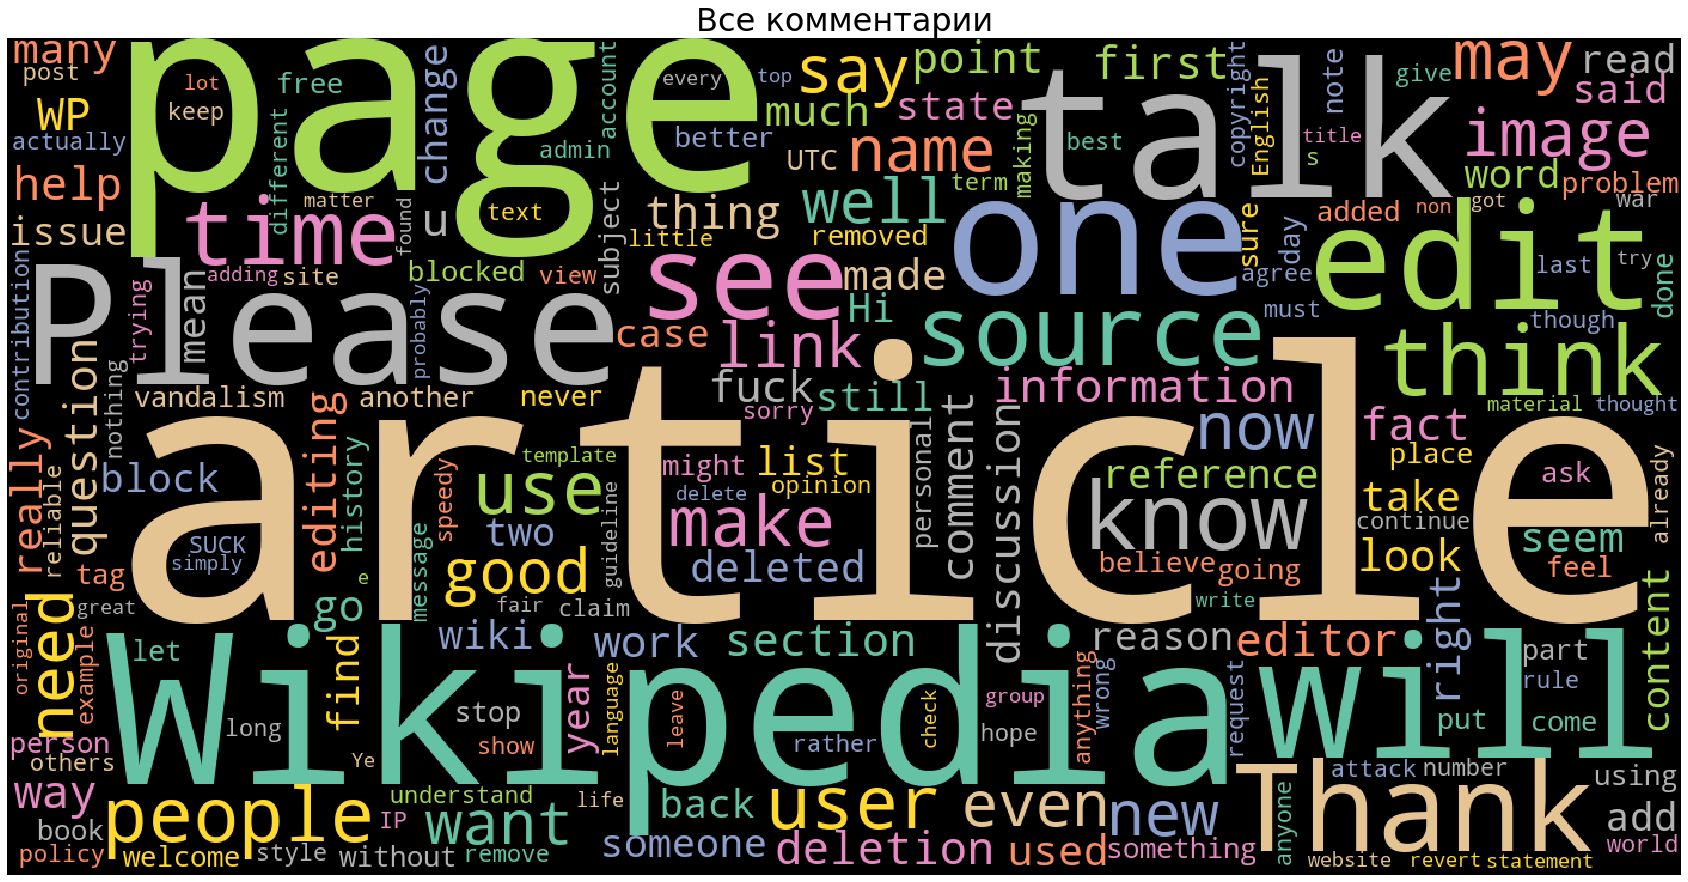

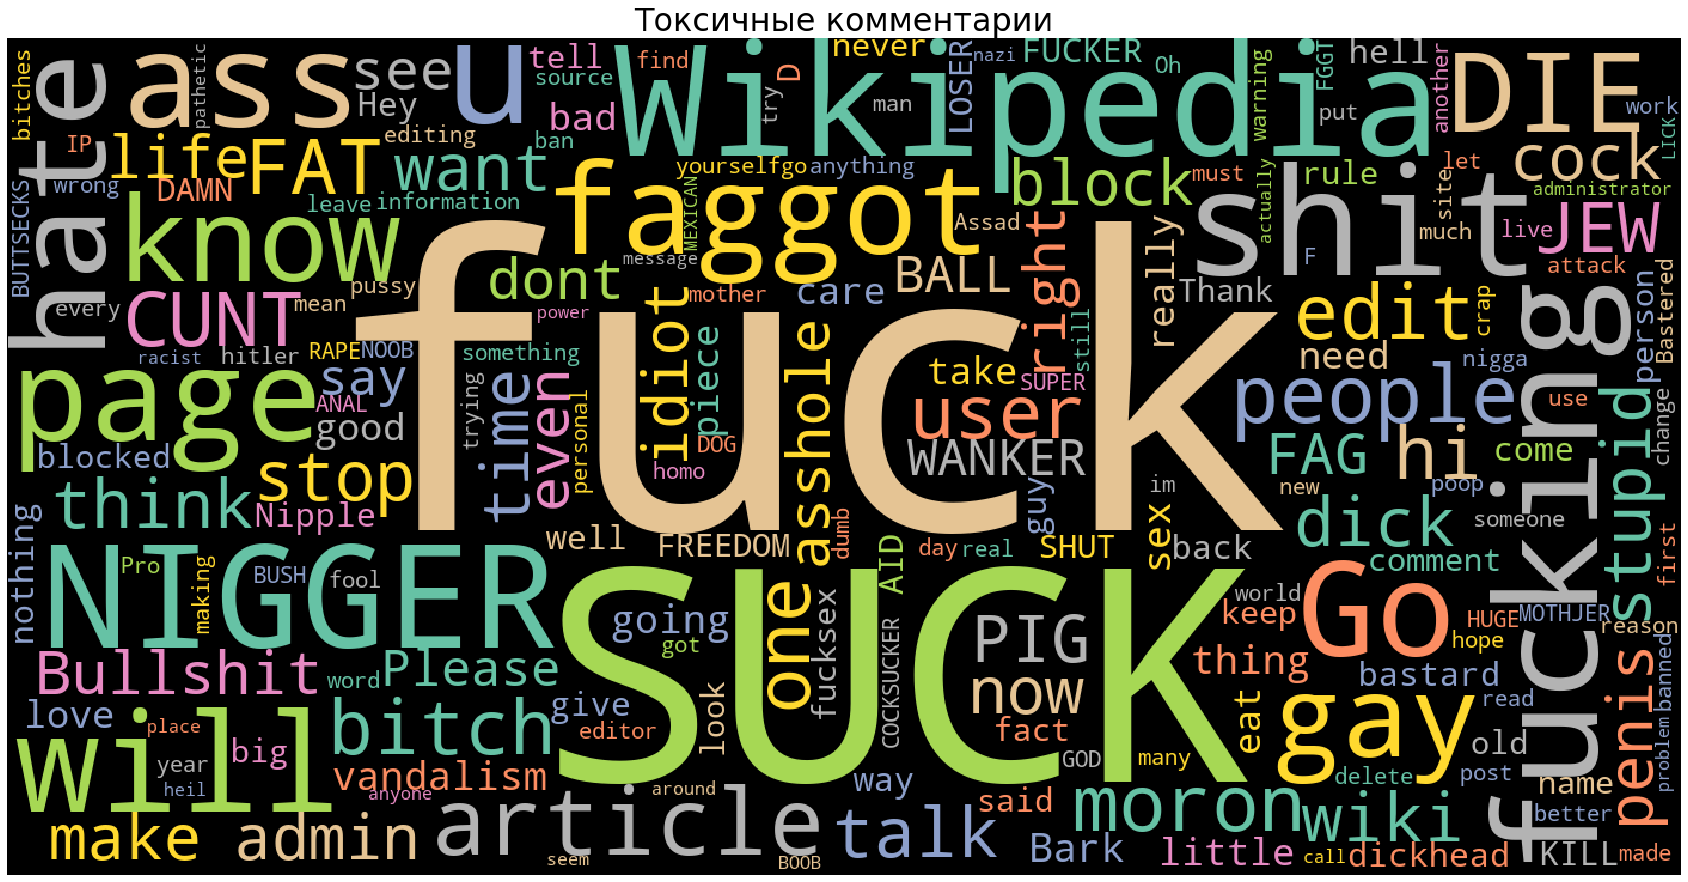

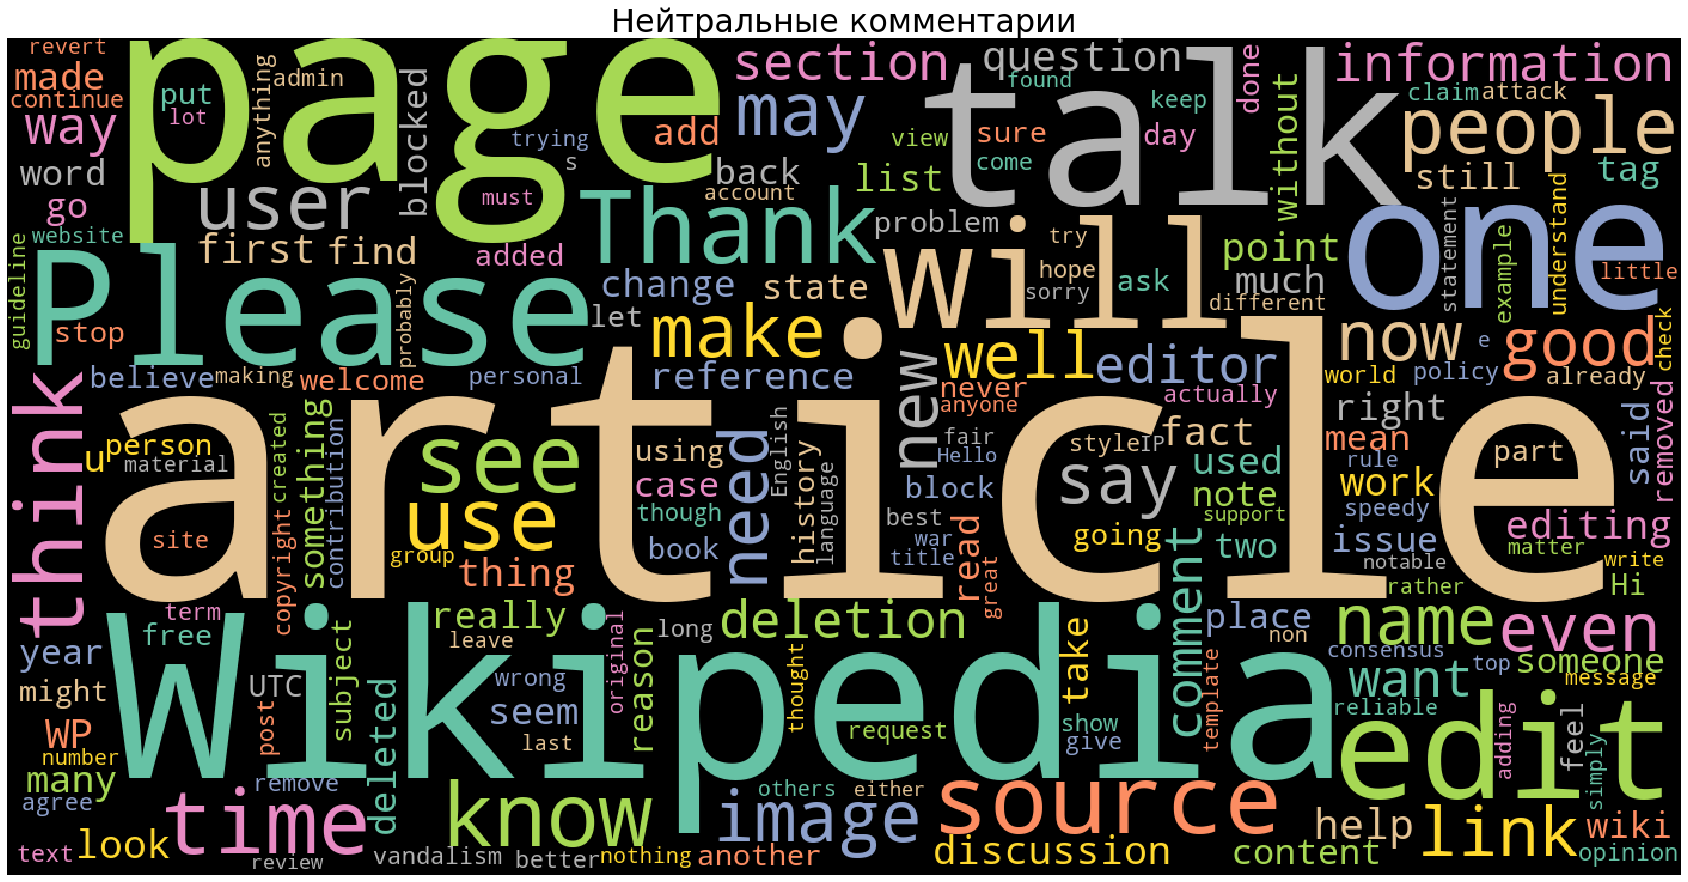

In [9]:
for key, value in lists_of_comments_by_type.items():
    
    wordcloud = WordCloud(random_state=123, 
                          width = 1400, 
                          height = 700,
                          background_color='black', 
                          colormap='Set2', 
                          collocations=False, 
                          stopwords = STOPWORDS).generate(value)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.title(key, fontsize=32)

Картинки выше наглядно отображают то, какие слова чаще всего используется в комментариях разной тональности.

### Предоработка текста

**Очистка от символов**

In [10]:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-Z ]', ' ', text)
    return clean_text

In [11]:
data['text_clear'] = data['text'].apply(lambda x: clear_text(x.lower()))

In [12]:
data.head()

,text,toxic,text_clear
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m s...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember...


**Очистка от стоп-слов**

In [13]:
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('english'))  

def stopwords(text):
    clean_text = [w for w in text.split() if not w in stop_words]  
    return clean_text

data['stopwords'] = data['text_clear'].apply(lambda x: stopwords(x))


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
data.head()

,text,toxic,text_clear,stopwords
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,"[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m s...,"[aww, matches, background, colour, seemingly, ..."
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it...,"[hey, man, really, trying, edit, war, guy, con..."
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on im...,"[make, real, suggestions, improvement, wondere..."
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember...,"[sir, hero, chance, remember, page]"


**Лемматизация текста**

In [15]:
# Функция лемматизиии текста
lemmatizer = nltk.WordNetLemmatizer()

def lemmatize(text):
    clean_text = [lemmatizer.lemmatize(word) for word in text]
    return clean_text

In [16]:
data['lemmatize'] = data['stopwords'].apply(lambda x: lemmatize(x))

In [17]:
data.head()

,text,toxic,text_clear,stopwords,lemmatize
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,"[explanation, edits, made, username, hardcore,...","[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m s...,"[aww, matches, background, colour, seemingly, ...","[aww, match, background, colour, seemingly, st..."
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it...,"[hey, man, really, trying, edit, war, guy, con...","[hey, man, really, trying, edit, war, guy, con..."
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on im...,"[make, real, suggestions, improvement, wondere...","[make, real, suggestion, improvement, wondered..."
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember...,"[sir, hero, chance, remember, page]","[sir, hero, chance, remember, page]"


**Вывод**

В предобработке текста выполнили следующие пункты:
- очистили комментарии от лишних символов (скобки, кавычки, пробелы и т.д.)
- удалили стоп-слова
- сделали лемматизацию слов
- посмотрели на часто употребляемые слова разной тональности

## Обучение

In [18]:
# Опредлим признаки и целевой признак 
X = data.drop('toxic', axis=1)
y = data['toxic']


#разделим датасет на обучающую и тестовую выборку размеров 60 на 40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=12345)

#### Разбиение на  варианты признаков датасетов

**Features без лемматизации текста**

In [19]:
corpus_train = X_train['stopwords'].astype('U')
corpus__train_valid = X_train_valid['stopwords'].astype('U')
corpus__valid = X_valid['stopwords'].astype('U')

**Features с лемматизацей текста**

In [20]:
corpus_train_lemm = X_train['lemmatize'].astype('U')
corpus__train_valid_lemm = X_train_valid['lemmatize'].astype('U')
corpus__valid_lemm = X_valid['lemmatize'].astype('U')

#### TF-IDF для корпуса текстов

**TF-IDF для корпуса текстов без лемматизации текста**

In [21]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
tf_idf = count_tf_idf.fit(corpus_train)
X_train = tf_idf.transform(corpus_train)
X_train_valid = tf_idf.transform(corpus__train_valid)
X_valid = tf_idf.transform(corpus__valid)

**TF-IDF для корпуса текстов c лемматизацей текста**

In [22]:
count_tf_idf_lemm = TfidfVectorizer(stop_words=stop_words)
tf_idf_lemm = count_tf_idf_lemm.fit(corpus_train_lemm)
X_train_lemm = tf_idf_lemm.transform(corpus_train_lemm)
X_train_valid_lemm = tf_idf_lemm.transform(corpus__train_valid_lemm)
X_valid_lemm = tf_idf_lemm.transform(corpus__valid_lemm)

#### CountVectorizer для корпуса текстов

**CountVectorizer для корпуса текста без лемматизации текста**

In [23]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(corpus_train)
X_train_vect = count_vect.transform(corpus_train)
X_train_valid_vect = count_vect.transform(corpus__train_valid) 
X_valid_vect = count_vect.transform(corpus__valid) 

**CountVectorizer для корпуса текста с лемматизацией текста**

In [24]:
count_vect = CountVectorizer()
X_lemm = count_vect.fit_transform(corpus_train_lemm)
X_train_vect_lemm = count_vect.transform(corpus_train_lemm)
X_train_valid_vect_lemm = count_vect.transform(corpus__train_valid_lemm) 
X_valid_vect_lemm = count_vect.transform(corpus__valid_lemm) 

### LogisticRegression

#### LogisticRegression - TF-IDF

**LogisticRegression - TF-IDF без лемматизации текста**

In [25]:
model = LogisticRegression(class_weight='balanced') 
model.fit(X_train, y_train)
predictions = model.predict(X_train_valid)

f1 = f1_score(y_train_valid, predictions)
print('LogisticRegression без лемматизации текста:', f1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression без лемматизации текста: 0.7552182163187855


**LogisticRegression - TF-IDF с лемматизацией текста**

In [26]:
model = LogisticRegression(class_weight='balanced') 
model.fit(X_train_lemm, y_train)
predictions = model.predict(X_train_valid_lemm)

f1 = f1_score(y_train_valid, predictions)
print('LogisticRegression с лемматизацией текста:', f1)

LogisticRegression с лемматизацией текста: 0.7469300587293113


**Вывод**
LogisticRegression - TF-IDF без лемматизации текста показала выше результат метрики качества F1.

#### LogisticRegression - CountVectorizer

**LogisticRegression - CountVectorizer без лемматизации текста**

In [27]:
model = LogisticRegression(class_weight='balanced') 
model.fit(X_train_vect, y_train)
predictions = model.predict(X_train_valid_vect)

f1 = f1_score(y_train_valid, predictions)
print('LogisticRegression с лемматизацией текста:', f1)

LogisticRegression с лемматизацией текста: 0.7510477787091365


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**LogisticRegression - CountVectorizer с лемматизацией текста**

In [28]:
model = LogisticRegression(class_weight='balanced') 
model.fit(X_train_vect_lemm, y_train)
predictions = model.predict(X_train_valid_vect_lemm)

f1 = f1_score(y_train_valid, predictions)
print('LogisticRegression с лемматизацией текста:', f1)

LogisticRegression с лемматизацией текста: 0.7445099089448313


**Вывод**
- LogisticRegression - CountVectorizer без лемматизации текста показала выше результат метрики качества F1.
- Метрика качества F1 у LogisticRegression - TF-IDF выше чем LogisticRegression - CountVectorizer без лемматизации текста
- Метрика качества F1 без лемматизации текста выше чем с лемматизацией текста

### DecisionTreeClassifier

Проверим метрику качества F1 по лучшим показалям LogisticRegression

#### DecisionTreeClassifier- TF-IDF без лемматизации текста

In [32]:
results_dtc = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth, class_weight = 'balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_train_valid)

    f1 = f1_score(y_train_valid, predictions)

    results_dtc.append({'Model': 'DecisionTreeClassifier', 
                        'Hyperparameters': {'random_state': 123, 
                                            'class_weight': 'balanced', 
                                            'max_depth': depth},
                        'F1 score': f1})

In [30]:
pd.DataFrame(results_dtc).style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Hyperparameters,F1 score
0,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 1}",0.270327
1,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 2}",0.370848
2,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 3}",0.371032
3,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 4}",0.418605
4,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 5}",0.424128
5,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 6}",0.461263
6,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 7}",0.496287
7,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 8}",0.522592
8,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 9}",0.546594
9,DecisionTreeClassifier,"{'random_state': 123, 'class_weight': 'balanced', 'max_depth': 10}",0.558956


Метрика качества F1 ниже 0.75, поэтому дальше не будем проверять.

###  LogisticRegression на тестовой выборке

In [31]:
model = LogisticRegression(class_weight='balanced') 
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

f1 = f1_score(y_valid, predictions)
print('LogisticRegression без лемматизации текста:', f1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression без лемматизации текста: 0.7555555555555555


**Вывод**
- LogisticRegression - TF-IDF без лемматизации текста показатель метрики качества F1 выше 0.75.

## Выводы

В предобработке текста выполнили следующие пункты:
- очистили комментарии от лишних символов (скобки, кавычки, пробелы и т.д.)
- удалили стоп-слова
- сделали лемматизацию слов
- посмотрели на часто употребляемые слова разной тональности
При расчете метрики качества F1 получили следующие результаты:
- Метрика качества F1 у LogisticRegression - TF-IDF выше чем LogisticRegression - CountVectorizer
- Метрика качества F1 без лемматизации текста выше чем с лемматизацией текста
- LogisticRegression - TF-IDF без лемматизации текста на тестовой выборке показал метрику качества F1 выше 0.75.
- Метрика качества F1 у LogisticRegression лучше чем DecisionTreeClassifier
- DecisionTreeClassifier метрика качества F1 ниже 0.75 